<a href="https://colab.research.google.com/github/bob8dod/NLP_SelfStudying/blob/main/RNN%2CLSTM(by%20Keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 케라스의 SimpleRNN과 LSTM 이해 + bidirection(양방향)

### RNN

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

In [ ]:
# 임의의 입력 생성
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_X))

(4, 5)


문장의 길이는 4 (단어의 개수), 백터의 차원은 5(임베딩의 결과)  
다시 말해 4번의 시점(timesteps)이 존재하고, 각 시점마다 5차원의 단어 벡터가 입력으로 사용

In [ ]:
#2D 텐서를 3D 텐서로 변경 _   배치 크기 1을 추가해주므로서 해결
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


(batch_size, timesteps, input_dim)에 해당되는 (1, 4, 5)의 크기를 가지는 3D 텐서가 생성

In [ ]:
# 은닉 상태의 크기를 3으로 지정하고, 두 인자 값이 모두 False일 때의 출력값
hidden_size = 3
rnn = SimpleRNN(hidden_size)
hidden_state = rnn(train_X) #출력값 ->  마지막 시점의 은닉 상태
print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[ 0.96368945 -0.4679326   0.6282686 ]], shape: (1, 3)


return_sequences = False인 경우에는 SimpleRNN은 마지막 시점의 은닉 상태만 출력

In [ ]:
# return_sequences를 True로 지정하여 모든 시점의 은닉 상태를 출력
hidden_size = 3
rnn = SimpleRNN(hidden_size, return_sequences=True)
hidden_states = rnn(train_X) # 모든 시점의 은닉 상태
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))

hidden states : [[[-0.66683996  0.9801001   0.94365513]
  [ 0.121343    0.99046004 -0.60518473]
  [-0.93688875  0.9586117   0.202979  ]
  [-0.6017417   0.97547644 -0.41433105]]], shape: (1, 4, 3)


(1, 4, 3) 크기의 텐서가 출력. 앞서 입력 데이터는 (1, 4, 5)의 크기를 가지는 3D 텐서, 그 중 4가 시점(timesteps)에 해당하는 값이므로 모든 시점에 대해서 은닉 상태의 값을 출력하여 (1, 4, 3) 크기의 텐서를 출력하는 것

In [ ]:
# return_state가 True일 경우 무조건 마지막 시점의 은닉 상태를 출력
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden states : [[[ 0.99958116 -0.976393   -0.9698981 ]
  [ 0.98737395 -0.90617484  0.724984  ]
  [ 0.8717771  -0.82542604  0.7534499 ]
  [ 0.9880784  -0.05747649  0.94639844]]], shape: (1, 4, 3)
last hidden state : [[ 0.9880784  -0.05747649  0.94639844]], shape: (1, 3)


첫번째 출력은 return_sequences=True로 인한 출력으로 모든 시점의 은닉 상태  
두번째 출력은 return_state=True로 인한 출력으로 마지막 시점의 은닉 상태 

### LSTM

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM

In [ ]:
#  return_sequences를 False로 두고, return_state가 True인 경우
hidden_size=3
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)
print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[ 0.0536137  -0.21565194 -0.1200773 ]], shape: (1, 3)
last hidden state : [[ 0.0536137  -0.21565194 -0.1200773 ]], shape: (1, 3)
last cell state : [[ 0.11871988 -0.6563361  -0.16144732]], shape: (1, 3)


세 개의 결과를 반환  
return_state를 True로 둔 경우에는 마지막 시점의 은닉 상태뿐만 아니라 **셀 상태**까지 반환

In [ ]:
#  return_sequences를 True로 두고, return_state가 True인 경우
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[-0.02282901 -0.00437691  0.01471106]
  [-0.01553637 -0.02808608  0.19243017]
  [ 0.07684343 -0.02255225 -0.24311349]
  [ 0.27054957  0.01514344  0.02564686]]], shape: (1, 4, 3)
last hidden state : [[0.27054957 0.01514344 0.02564686]], shape: (1, 3)
last cell state : [[0.30442485 0.02871585 0.06054708]], shape: (1, 3)


### Bidirectional(LSTM)

In [ ]:
# return_sequences가 True인 경우와 False인 경우에 대해서 
# 은닉 상태의 값이 어떻게 바뀌는지 직접 비교하기 위해서 이번에는 출력되는 은닉 상태의 값을 고정
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

In [ ]:
# 1. return_sequences가 False이고, return_state가 True
hidden_size = 3
bilstm = Bidirectional(LSTM(hidden_size, return_sequences=False, return_state=True, kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[0.6303139  0.6303139  0.6303139  0.70387346 0.70387346 0.70387346]], shape: (1, 6)
forward state : [[0.6303139 0.6303139 0.6303139]], shape: (1, 3)
backward state : [[0.70387346 0.70387346 0.70387346]], shape: (1, 3)


- return_state가 True인 경우  
정방향 LSTM의 은닉 상태와 셀 상태, 역방향 LSTM의 은닉 상태와 셀 상태 4가지를 반환하기 때문에
총 5개의 값을 반환  
첫번째 출력값의 크기가 (1, 6)인 것에 주목  
- return_sequences가 False인 경우  
정방향 LSTM의 마지막 시점의 은닉 상태와 역방향 LSTM의 첫번째 시점의 은닉 상태가 연결된 채 반환  


- 정방향 LSTM의 마지막 시점의 은닉 상태값 : [0.6303139 0.6303139 0.6303139]
- 역방향 LSTM의 첫번째 시점의 은닉 상태값 : [0.70387346 0.70387346 0.70387346]

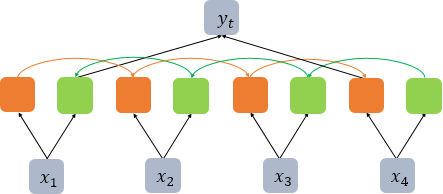

In [ ]:
# return_sequences를 True로 변경, return_state가 True 일 경우
# 위에서 값을 고정하였으므로 비교 가능
bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True,
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[[0.35906476 0.35906476 0.35906476 0.70387346 0.70387346 0.70387346]
  [0.5511133  0.5511133  0.5511133  0.5886358  0.5886358  0.5886358 ]
  [0.5911575  0.5911575  0.5911575  0.39516988 0.39516988 0.39516988]
  [0.6303139  0.6303139  0.6303139  0.2194224  0.2194224  0.2194224 ]]], shape: (1, 4, 6)
forward state : [[0.6303139 0.6303139 0.6303139]], shape: (1, 3)
backward state : [[0.70387346 0.70387346 0.70387346]], shape: (1, 3)


모든 시점의 은닉 상태가 출력  
방향 LSTM의 첫번째 시점의 은닉 상태는 더 이상 정방향 LSTM의 마지막 시점의 은닉 상태와 연결되는 것이 아니라 정방향 LSTM의 첫번째 시점의 은닉 상태와 연결

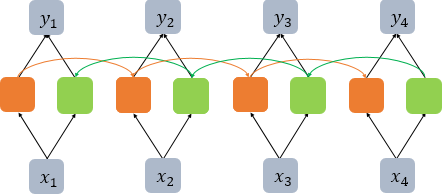